# 20.OLS를 통한 집값 분석 회귀모델 평가

## 1) Library & Data Import

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")

In [3]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


#### Feature Description
- TOWN : 지역 이름
- LON, LAT : 위도, 경도 정보
- **CMEDV : 해당 지역의 집값(중간값)**
- CRIM : 근방 범죄율
- ZN : 주택지 비율
- INDUS : 상업적 비즈니스에 활용되지 않는 농지 면적
- CHAS : 경계선에 강에 있는지 여부
- NOX : 산화 질소 농도
- RM : 자택당 평균 방 갯수
- AGE : 1940 년 이전에 건설된 비율
- DIS : 5 개의 보스턴 고용 센터와의 거리에 다른 가중치 부여
- RAD : radial 고속도로와의 접근성 지수
- TAX : 10000달러당 재산세
- PTRATIO : 지역별 학생-교사 비율
- B : 지역의 흑인 지수 (1000(B - 0.63)^2), B는 흑인의 비율.
- LSTAT : 빈곤층의 비율

-----

## 2) EDA (Exploratory Data Analysis : 탐색적 데이터 분석)

### 2-1) 회귀 분석 종속(목표) 변수 탐색

##### 데이터셋 기본 정보 탐색

In [4]:
df.shape

(506, 17)

In [5]:
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


##### 'CMEDV' 피처 탐색

In [7]:
df['CMEDV'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

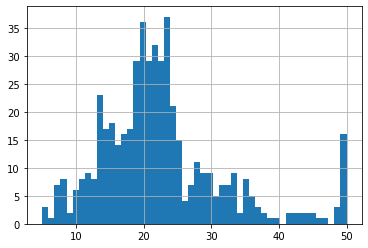

In [8]:
df['CMEDV'].hist(bins=50)

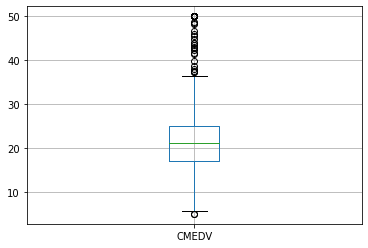

In [9]:
df.boxplot(column=['CMEDV'])

-----

### 2-2) 회귀 분석 설명 변수 탐색

##### 설명 변수들의 분포 탐색

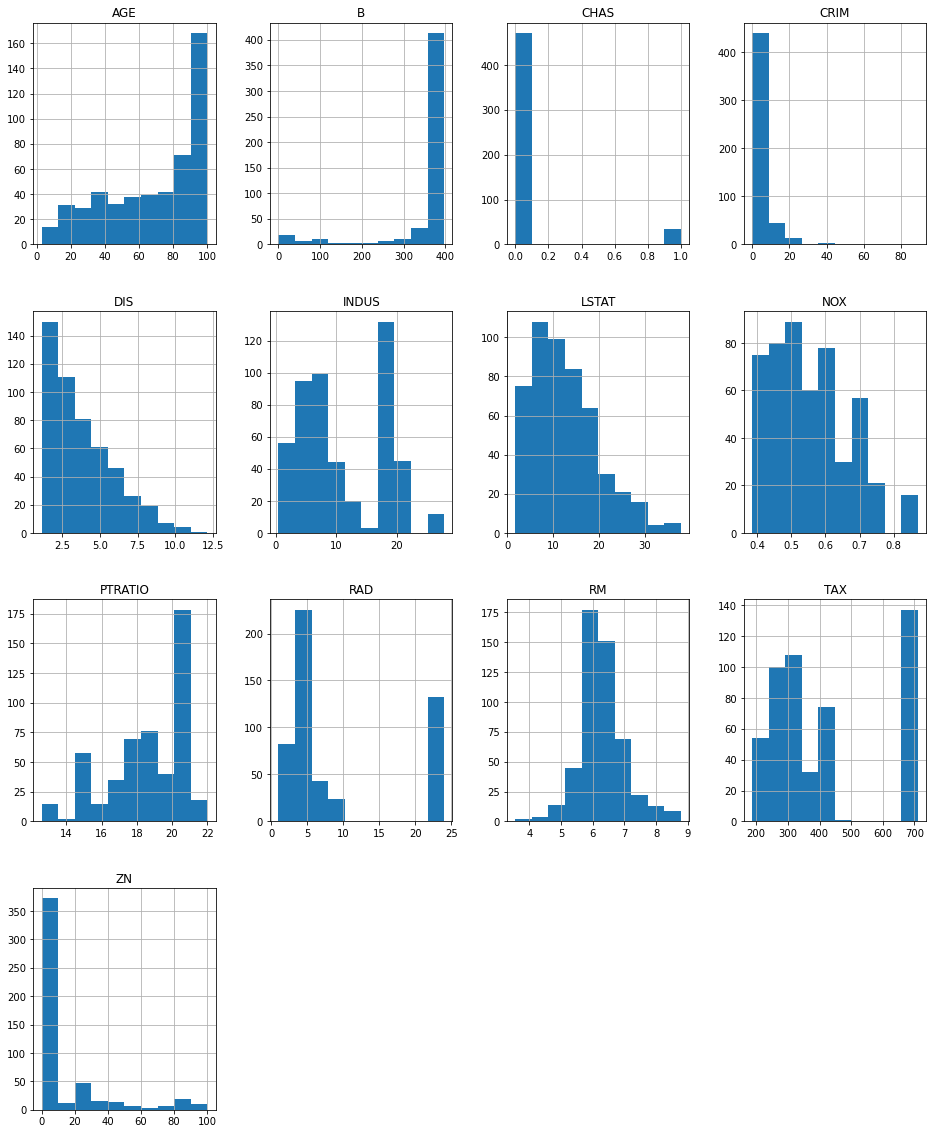

In [10]:
numerical_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                     'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
                     'B', 'LSTAT']

fig = plt.figure(figsize = (16, 20))
ax = fig.gca()

df[numerical_columns].hist(ax=ax)
plt.show()

##### 설명 변수들의 상관관계 탐색

In [11]:
cols = ['CMEDV', 'CRIM', 'ZN', 'INDUS', 
        'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
corr = df[cols].corr(method = 'pearson')

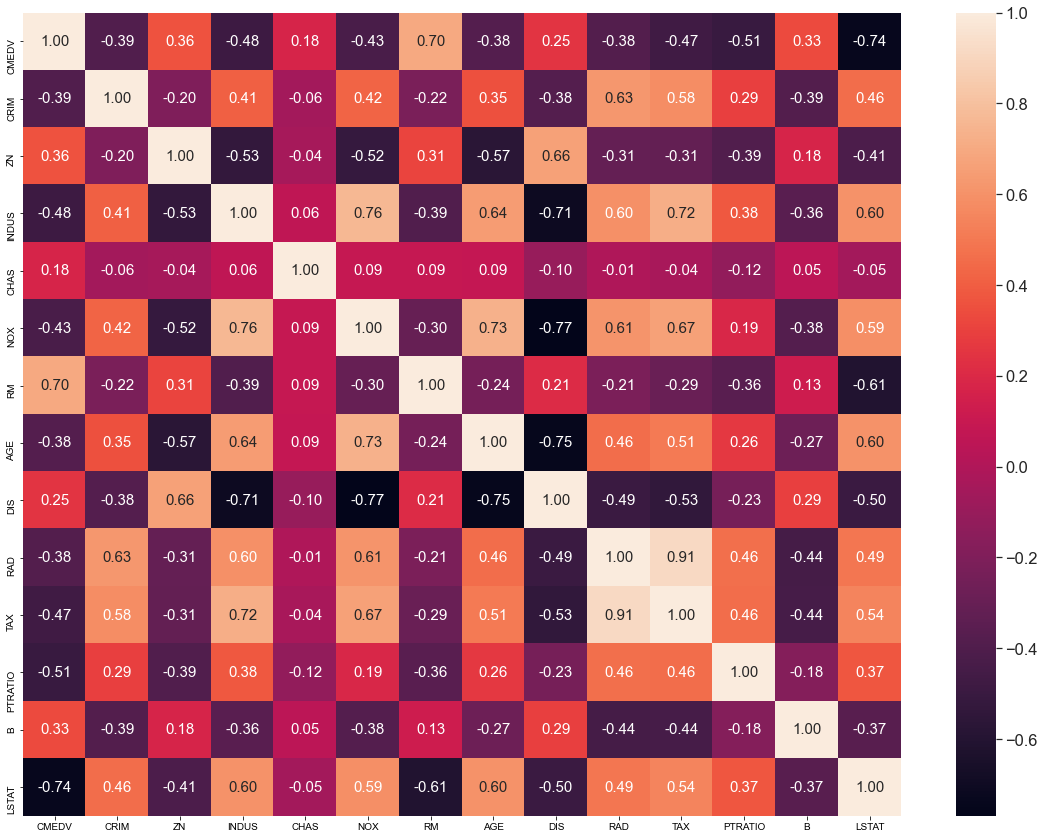

In [12]:
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                 annot=True, 
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols,
                 ax=ax)
plt.tight_layout()
plt.show()

##### 설명 변수와 종속 변수의 관계 탐색

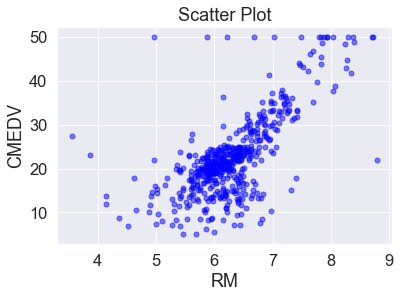

In [13]:
plt.plot('RM', 'CMEDV', 
         data=df,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('RM')
plt.ylabel('CMEDV')
plt.show()

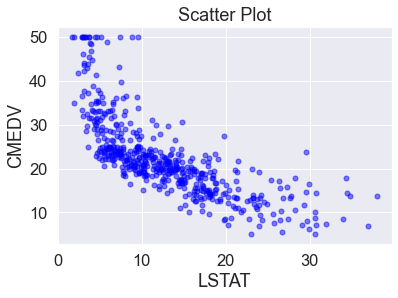

In [14]:
plt.plot('LSTAT', 'CMEDV',
         data=df,
         linestyle='none',
         marker='o',
         markersize=5,
         color='blue',
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('LSTAT')
plt.ylabel('CMEDV')
plt.show()

##### 지역별 차이 탐색

In [15]:
df['TOWN'].value_counts()

Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Medfield              1
Cohasset              1
Duxbury               1
Norwell               1
Wenham                1
Name: TOWN, Length: 92, dtype: int64

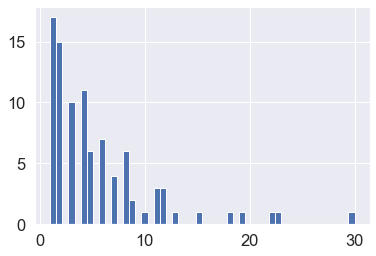

In [16]:
df['TOWN'].value_counts().hist(bins=50)

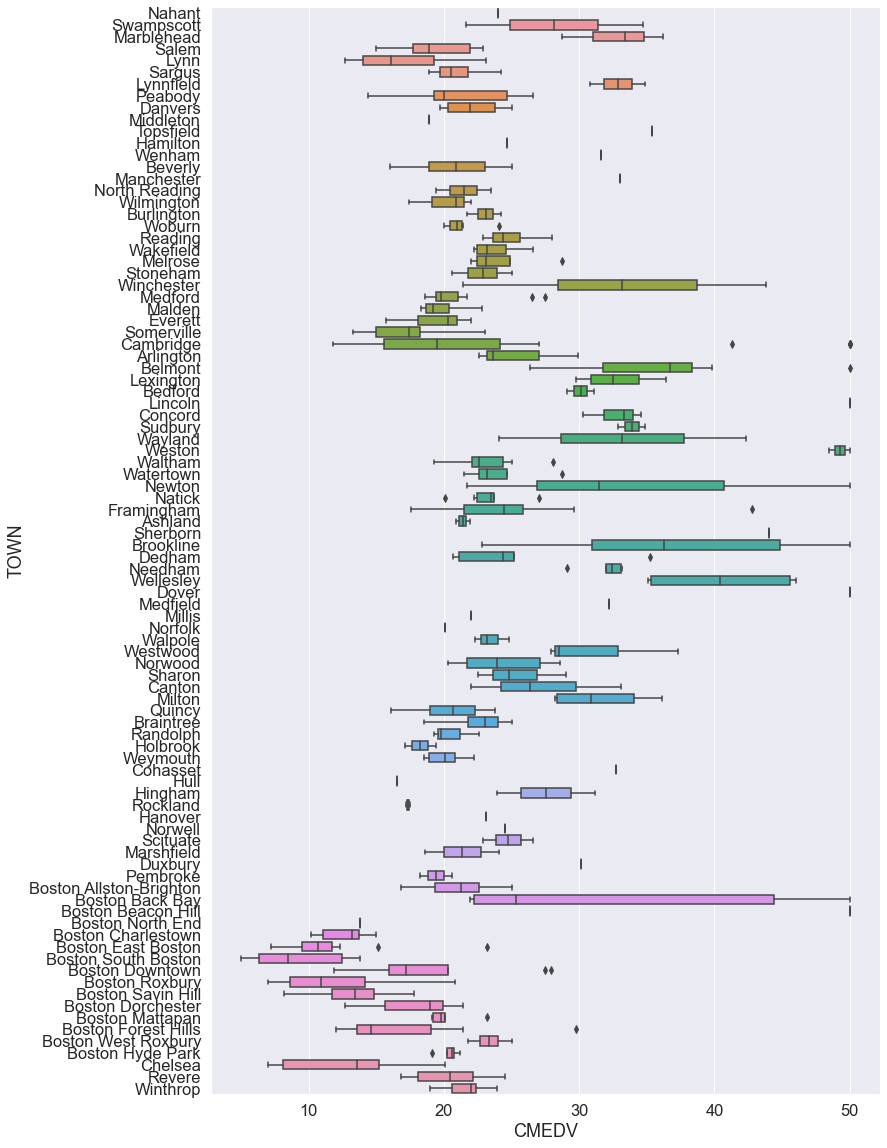

In [17]:
fig = plt.figure(figsize = (12, 20))
ax = fig.gca()
sns.boxplot(x='CMEDV', y='TOWN', data=df, ax=ax)

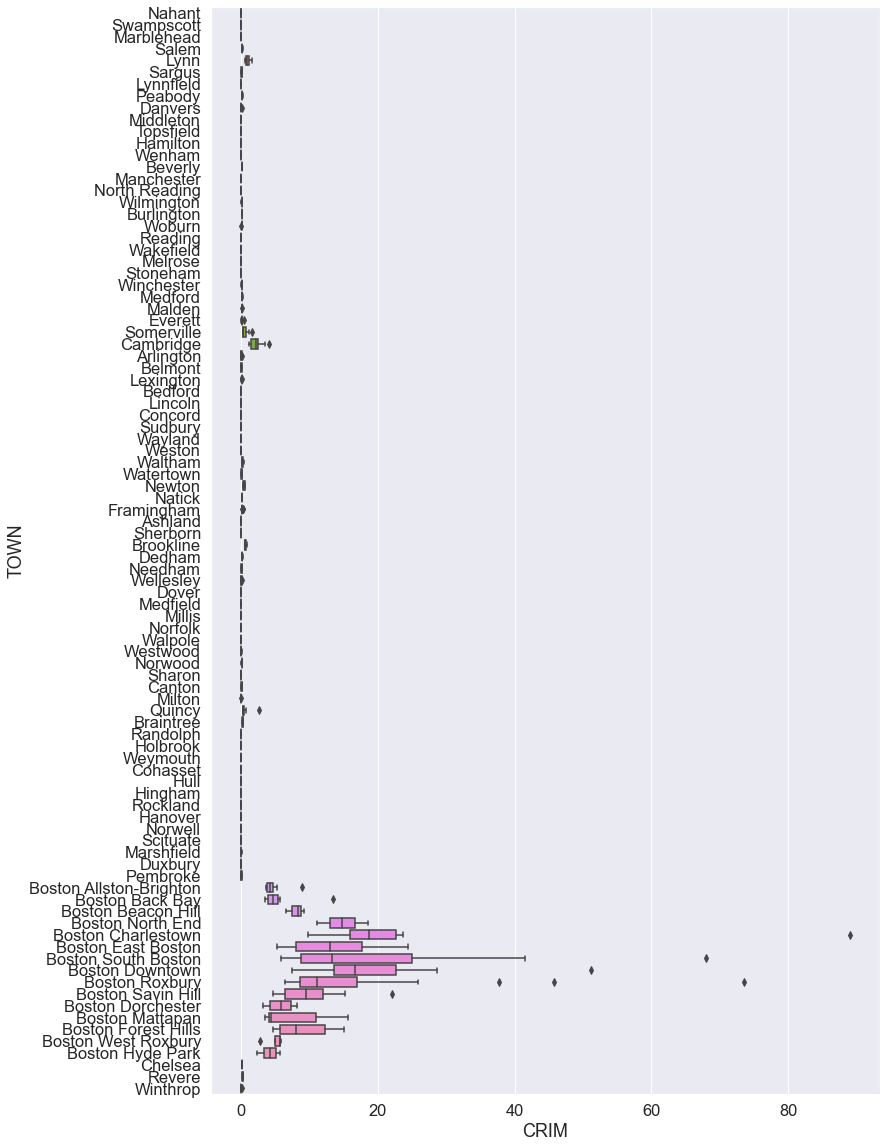

In [18]:
fig = plt.figure(figsize = (12, 20))
ax = fig.gca()
sns.boxplot(x='CRIM', y='TOWN', data=df, ax=ax)

-----

## 3) 집값 예측 분석 : 회귀분석

### 3-1) 데이터 전처리

##### 피처 표준화

In [19]:
from sklearn.preprocessing import StandardScaler

# feature standardization
scaler = StandardScaler()
scale_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df[scale_columns] = scaler.fit_transform(df[scale_columns])

##### 데이터셋 분리

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# dataset split to train/test
X = df[scale_columns]
y = df['CMEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

-----

### 3-2) 회귀 분석 모델 학습

In [21]:
# train regression model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# print coef
print(lr.coef_)

[-1.01246321  1.18147644  0.36876238 -1.75005213  2.79721593  0.05595666
 -3.28158962  3.13660626 -2.65721978 -1.88660796  0.86579287 -4.25781524]


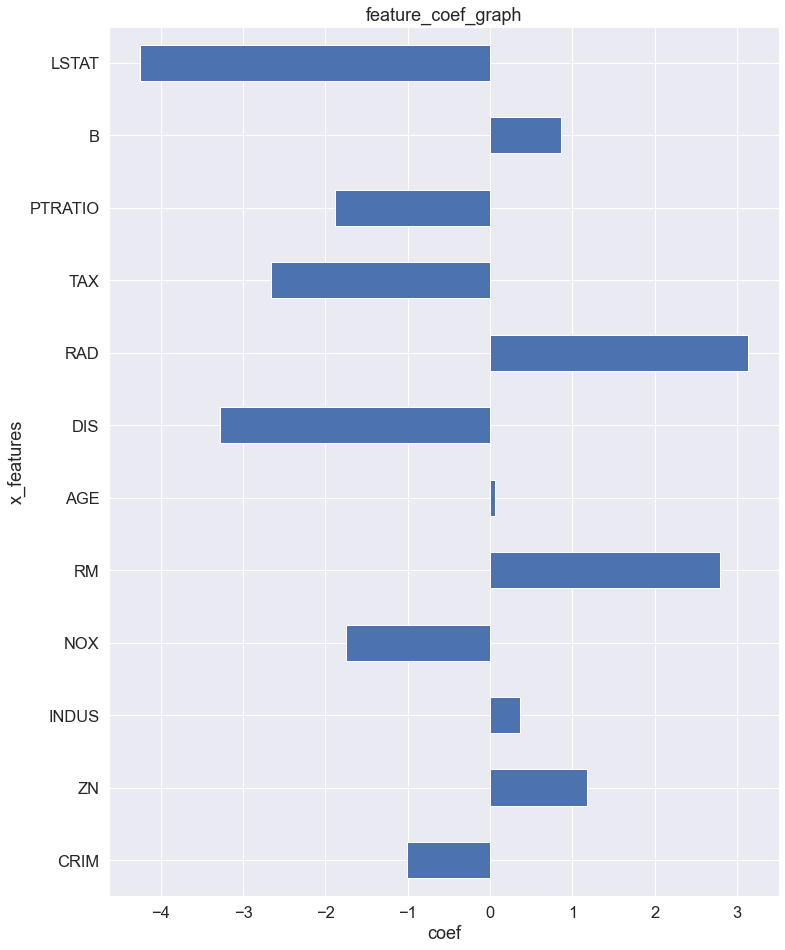

In [22]:
# figure size
plt.rcParams['figure.figsize'] = [12, 16]

# graph values
coefs = lr.coef_.tolist()
coefs_series = pd.Series(coefs)

# graph info
x_labels = scale_columns
ax = coefs_series.plot.barh()
ax.set_title('feature_coef_graph')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_yticklabels(x_labels)
plt.show()

-----

### 3-3) 학습 결과 해석

##### R2 score, RMSE score 계산

In [23]:
# print r2 score
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7423254512717083
0.7058382423177553


In [24]:
# print rmse
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))

y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

4.734144294797511
4.576957797795082


In [25]:
y_train.shape

(404,)

## stats model의 ols를 사용하여 선형회귀분석을 합니다. 
##### 1. 회귀분석 결과가 좋은지 나쁜지 판단하기 쉽다.
##### 2. 피처 유의성 검정
- R-squared : 0 ~ 1. 1에 가까울수록 잘 학습된 모델
- 유의도(Prob (F-statistic)) : 0 수렴할수록 잘 학습된 모델
- P>|t| : P-values : 각 변수들에 대한 유의성을 볼수 있으며, 0.05 보다 작아야 (권고). 너무 크면 변수가 유의하지 않아 학습시 제외 하거나 다른 처리하면 성능이 올라갈수 있다.


In [26]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     93.87
Date:                Sun, 20 Sep 2020   Prob (F-statistic):          4.27e-107
Time:                        08:37:54   Log-Likelihood:                -1201.4
No. Observations:                 404   AIC:                             2429.
Df Residuals:                     391   BIC:                             2481.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4928      0.240     93.582      0.000      22.020      22.965
CRIM          -1.0125      0.302     -3.348      0.001      -1.607      -0.418
ZN             1.1815      0.357      3.307      0.001       0.479       1.884
INDUS          0.3688      0.473      0.779      0.436      -0.561       1.299
NOX           -1.7501      0.518     -3.376      0.001      -2.769      -0.731
RM             2.7972      0.329      8.497      0.000       2.150       3.444
AGE            0.0560      0.414      0.135      0.892      -0.757       0.869
DIS           -3.2816      0.496     -6.611      0.000      -4.258      -2.306
RAD            3.1366      0.652      4.814      0.000       1.856       4.418
TAX           -2.6572      0.719     -3.696      0.000      -4.071      -1.244
PTRATIO       -1.8866      0.314     -6.011      0.000      -2.504      -1.270
B              0.8658      0.296      2.930      0.004       0.285       1.447
LSTAT         -4.2578      0.409    -10.421      0.000      -5.061      -3.455
==============================================================================
Omnibus:                      174.774   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.093
Skew:                           1.835   Prob(JB):                    4.65e-187
Kurtosis:                       9.124   Cond. No.                         9.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 다중 공선성
- 변수가 10보다 크면 다른 변수와 높은 상관관계가 있어 다중공선성 발생한 변수이다고 판단 기준 제공
- 10보다 높다면 제거 권고

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,1.0,const
1,1.7,CRIM
2,2.2,ZN
3,3.8,INDUS
4,4.4,NOX
5,1.9,RM
6,3.0,AGE
7,4.1,DIS
8,6.8,RAD
9,8.5,TAX
